
# Trabajo practico 1


## Integrantes:

* Lara Herling - 314/22

* Valentina Anton - 322/20


## IMPORTS

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## DATOS UTILIZADOS

In [26]:
encabezado = np.arange(0, 785, 1)
datos = pd.read_csv("~/Descargas/mnist_train.csv", names=encabezado)
df_testeo = pd.read_csv("~/Descargas/mnist_test.csv", names=encabezado)

datos_reducidos = datos.head(2000)
test_reducido = df_testeo.head(200)


## EJERCICIO 1

### ITEM A

In [27]:
#Funcion que, dado un df y un n, devuelve la fila n del df como un array
def fila_df(df, n):
    fila = df.iloc[n:n+1]
    fila = fila.to_numpy()
    fila = fila[0] #to_numpy devuelve una matriz cuyo primer elemento es el array con los datos
    return fila

#Funcion que dado un array correspondiente al gráfico de un dígito, devuelve su gráfico
def graficar(v):
    titulo = v[0]
    figura = v[1:].reshape(28, 28)
    
    plt.figure(figsize=(5,3))
    plt.imshow(figura, cmap='gray')
    plt.title(titulo)
    plt.show()
    plt.close()

#Función que dado un numero n y un conjunto de datos, grafica dicha columna n
def imagen (n, datos):
    imagen = fila_df(datos, n)
    graficar(imagen)


### ITEM B

In [28]:
#Funcion que, dado un dígito y una base de datos devuelve un nuevo df con las filas correspondientes a ese digito
def df_digito (n, datos):
    nombre_columna = datos.columns[0]
    df = datos[datos[nombre_columna] == n]
    return df

#Dada una base de datos y un dígito, la función devuelve la cantidad de filas que corresponden a ese dígito
def cantidad(n, datos):
    df = df_digito(n, datos)
    cantidad = df.shape[0]
    return cantidad

### ITEM C


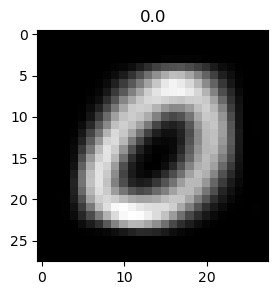

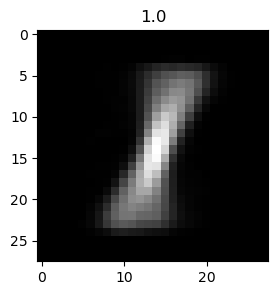

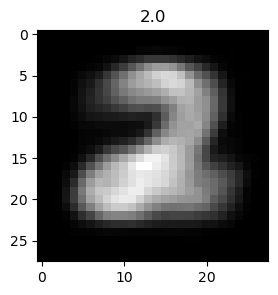

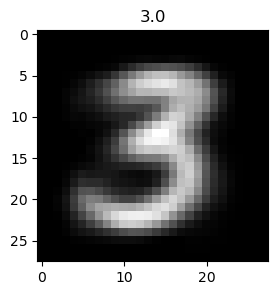

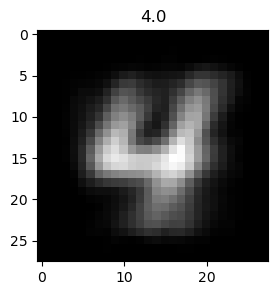

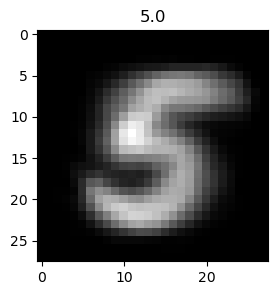

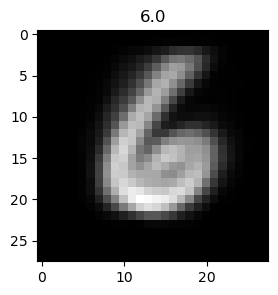

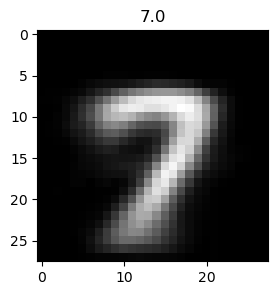

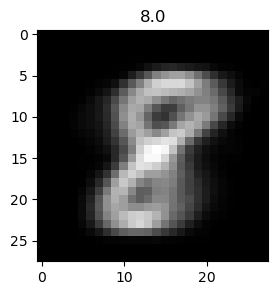

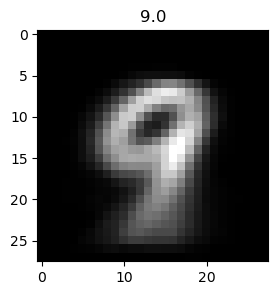

In [29]:
#Función que, dado un dígito y un conjunto de datos, devuelve un array con la imagen promedio de cada dígito
def promedio(n, datos):
    df = df_digito(n, datos)
    p = []
    for i in range(0, 785, 1):
        promedio_columna = df[i].mean()
        p.append(promedio_columna)
    
    p = np.array(p)
    return p


for i in range(0, 10, 1):
    graficar(promedio(i, datos_reducidos))

## EJERCICIO 2

### ITEM A

In [30]:
#Definimos una matriz con los promedios calculados para cada uno de los dígios. 

#Lo dejo como matriz porque es más cómodo para el punto de las predicciones, tambien se podria hacer un df 
#y después convertirlo a array

matriz_promedios = np.array([promedio(0, datos_reducidos)])
for i in range(1, 10, 1):
    matriz_promedios = np.vstack([matriz_promedios, promedio(i, datos_reducidos)])


#Defino una función que, dados los promedios (matriz), un conjunto de datos de testeo
#y una fila determinada, devuelve la predicción del dígito, en base a las distancias euclídeas
def prediccion_promedio(promedios, test, n):
    pred = 0
    fila = fila_df(test, n)
    dist_min = np.linalg.norm(fila - promedios[0])
    k = 1
    while k<10:
        distancia = np.linalg.norm(fila - promedios[k])
        if distancia < dist_min:
            dist_min = distancia
            pred = k
        k+=1
    return pred


def lista_predicciones_promedio(promedios, test):
    predicciones = []
    l = test.shape[0]
    for i in range (0, l, 1):
        pred = prediccion_promedio(promedios, test, i)
        predicciones.append(pred)
     
    predicciones = np.array(predicciones)
    return predicciones


predicciones = lista_predicciones_promedio(matriz_promedios, test_reducido)

### ITEM B

In [31]:
def precision(test, prediccion):
    aciertos = 0
    l = len(prediccion)
    for i in range(0, l, 1):
        p = prediccion[i]
        rta = test[0][i]
        if p == rta:
            aciertos+=1
    
    prec = aciertos/l
    return prec

### ITEM C

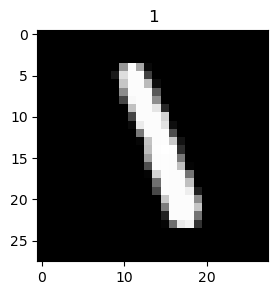

Su prediccion: 5


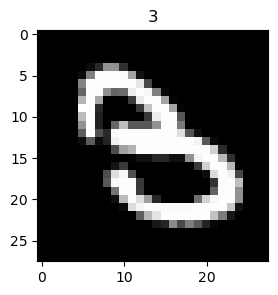

Su prediccion: 5


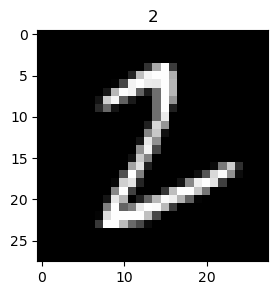

Su prediccion: 3


In [32]:
#Defino una función que, dada una lista de predicciones y un conjunto de datos de testeo
#Devuelve un lista con los números de las filas en las cuales falló la predicción

def errores(test, prediccion):
    e = []
    l = len(prediccion)
    for i in range(0, l, 1):
        p = prediccion[i]
        rta = test[0][i]
        if p != rta:
            e.append(i)
            
    return e

e = errores(test_reducido, predicciones)

#Ejemplos
imagen(46, test_reducido)
p1 = prediccion_promedio(matriz_promedios, test_reducido, 46)
print("Su prediccion:" , p1)

imagen(18, test_reducido)
p2 = prediccion_promedio(matriz_promedios, test_reducido, 18)
print("Su prediccion:" , p2)

imagen(38, test_reducido)
p3 = prediccion_promedio(matriz_promedios, test_reducido, 38)
print("Su prediccion:" , p3)

### Conclusiones
La precisión de las predicciones realizadas utilizando los promedios de cada matriz es de aprox 0.77.

Si bien presenta una mayoría de aciertos, el modelo cuenta con una gran cantidad de errores y este valor de precisión puede resultar más bien bajo en caso de que estas predicciones deban ser utilizadas para una tarea específica. 

## EJERCICIO 3

In [33]:
#Dada una matriz A, esta función devuelve el producto entre su transpuesta y ella misma.
def matriz_B(A):
    A_transpuesta = A.T 
    B = A_transpuesta @ A
    
    return B

#Función que, dada una matriz, aplica el método de la potencia para encontrar su primer autovector
def metodo_de_la_potencia(B):
    columnas = B.shape[0]
    x0 = np.random.rand(columnas)
    x0 = x0/np.linalg.norm(x0)
    x1 = B@x0/np.linalg.norm(B@x0, 2)
    
    epsd = np.finfo(np.float64).eps
    while x1@x0 < 1-epsd:
        v = B@x1/np.linalg.norm(B@x1, 2)
        x0 = x1
        x1 = v
    
    return x1

#Funcion que, dados una matriz A y su primer autovector, devuelve el valor de theta correspondiente
def theta(A, v):
    Av = A@v
    sv = np.linalg.norm(Av, 2)
    
    return sv

#Funcion que, dados una matriz A y su primer autovector, devuelve el valor de u correspondiente
def columna_u(A, v):
    Av = A@v
    u = Av/np.linalg.norm(Av, 2)
    
    return u

#Funcion que, dados los valores de A, theta, u y v, devuelve A'
def a_prima(A, sv, u, v):
    
    u = u.reshape(u.shape[0], 1)
    v = v.reshape(1, v.shape[0])
    
    x = (sv*u)@v
    A_prima = A - x
    
    return A_prima
 
#Dados dos vectores u y v en R^n, esta función devuelve la proyección de u sobre v
def proyeccion(u, v):
    v_normalizado = v / np.linalg.norm(v)
    proyec = np.dot(u, v_normalizado) * v_normalizado

    return proyec

#Funcion que, dado un conjunto de vectores de tamaño n, devuelve un nuevo vector de tamaño n
#que será ortogonal a todos ellos y de norma = 1
def vector_ortonormal(vectores):
    #defino un vector cualquiera
    long = len(vectores[0])
    vector_ortogonal = np.random.rand(long)
    
    #busco ortogonalizarlo
    for v in vectores:
        vector_ortogonal = vector_ortogonal - proyeccion(vector_ortogonal, v)
        
    #lo normalizo
    vector_ortonormal = vector_ortogonal/np.linalg.norm(vector_ortogonal, 2)
    
    return vector_ortonormal

#Funcion que, dada una matriz de nxm, con n>m, la extiende a una matriz cuadrada de forma tal
#que sus columnas conformen una base ortonormal de R^n (sea unitaria)
#Se asume que las columnas de la matriz ingresada ya conforman un conjunto ortonormal
def extender_matriz(U):
    filas = U.shape[0]
    columnas = U.shape[1]
    
    #trasponemos la matriz y convertimos el array a una lista de sus vectores columna
    U_transpuesta = U.T
    v_columna = U_transpuesta.tolist()
    
    i = columnas
    while i<filas:
        vector = vector_ortonormal(v_columna)
        U_transpuesta = np.vstack((U_transpuesta, vector))
        v_columna = U_transpuesta.tolist()
        
        i+=1
    
    #Obtenemos la matriz que buscamos, pero transpuesta. Entonces:
    
    matriz_U = U_transpuesta.T
    
    return matriz_U

def descomposicion_SVD(A):
    filas = A.shape[0]
    columnas = A.shape[1]
    
    U_lista = []
    E = np.zeros((filas, columnas))
    V_lista = []
    
    menor = min(filas, columnas)
    for i in range(0, menor):
        B = matriz_B(A)
        v = metodo_de_la_potencia(B)
        u = columna_u(A, v)
        sv = theta(A, v)
        
        U_lista.append(u)
        E[i][i] = sv
        V_lista.append(v)
        
        A = a_prima(A, sv, u, v)
        
    U = np.array(U_lista).T
    V = np.array(V_lista).T
    
    if filas>columnas:
        U = extender_matriz(U)
        
    elif columnas>filas:
        V = extender_matriz(V)
        
    return U, E, V

## EJERCICIO 4

### ITEM A


In [34]:
#Defino una función que, dado un DataFrame, remueve la primera columna
def sacar_primera_columna(df):
    res = df.iloc[:, 1:]
    return res

#Funcion que dado un dataset, genera una lista conteniendo las 10 matrices con la información de las imágenes
#correspondiente a cada uno de los dígitos
#Las matrices contienen únicamente la información de los pixeles, sin la designación del dígito
#y ahora transpuestas, de manera tal que cada columna representa una imágen. 

def matrices_digitos(datos):
    matrices_digitos = []
    for i in range(0, 10, 1):
        df = df_digito(i, datos)
        df = sacar_primera_columna(df)
        matriz = np.array(df).T
        matrices_digitos.append(matriz)
        
    return matrices_digitos


matrices_digitos = matrices_digitos(datos_reducidos)

### ITEM B


In [35]:
#Dada una lista de matrices, devuelve 3 listas con las matrices correspondientes
#a la descomposición de cada una de ellas
def svd_lista(lista):
    lista_U = []
    lista_E = []
    lista_V = []
    for matriz in lista:
        descomposicion = descomposicion_SVD(matriz)
        U = descomposicion[0]
        lista_U.append(U)
        
        E = descomposicion[1]
        lista_E.append(E)
        
        V = descomposicion[2]
        lista_V.append(V)
        
    return lista_U, lista_E, lista_V


### ITEM C


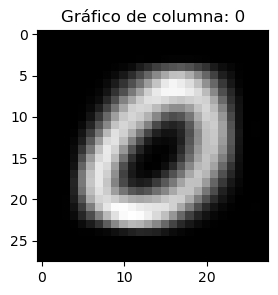

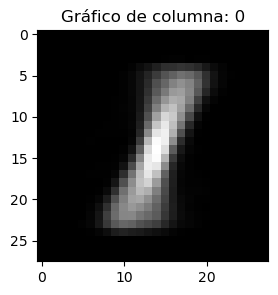

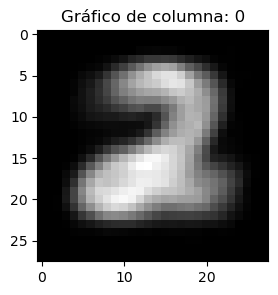

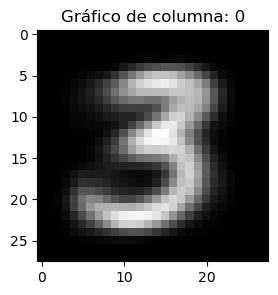

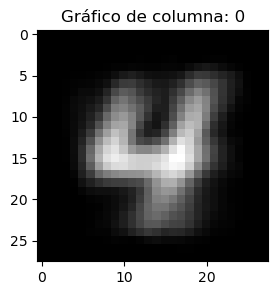

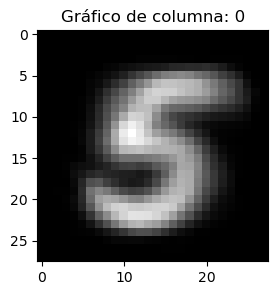

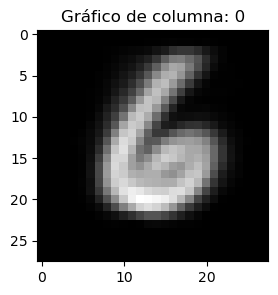

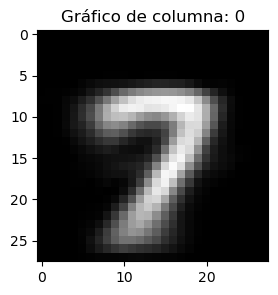

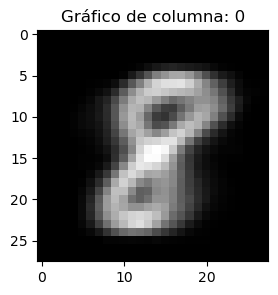

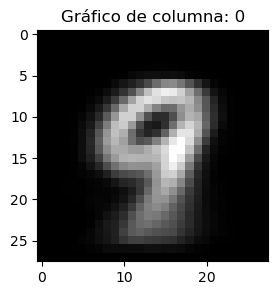

In [36]:
#Dada una matriz de 784 filas y un n, la función grafica la imagen generada por la columna n de la matriz
def graficar_columna(V, n):
    columna = V[:, n].reshape(28, 28)
    
    num = str(n)
    plt.figure(figsize=(5,3))
    plt.imshow(columna, cmap='gray')
    plt.title('Gráfico de columna: '+ num)
    plt.show()
    plt.close()
    

def grafico_columna_matriz(M, n):
    for i in range(0,10):
        graficar_columna(M[i], n)
    

#Le calculamos su descomposicion SVD
matrices_U = svd_lista(matrices_digitos)[0]

#Graficamos la primer columna de todas las matrices U
grafico_columna_matriz(matrices_U, 0)

### ITEM D


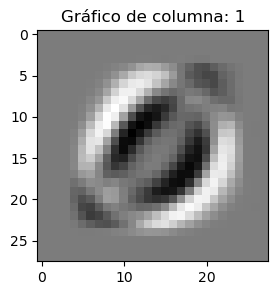

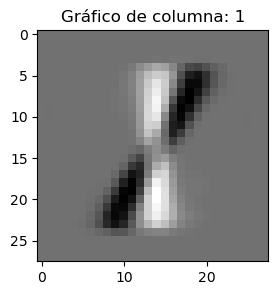

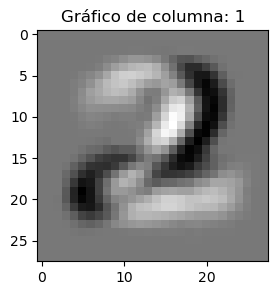

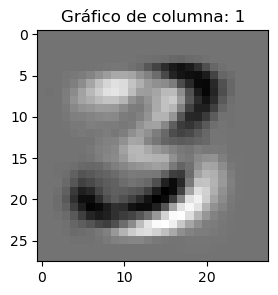

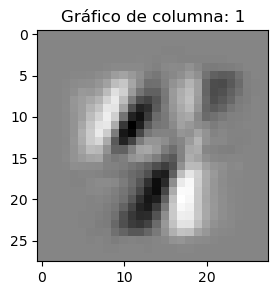

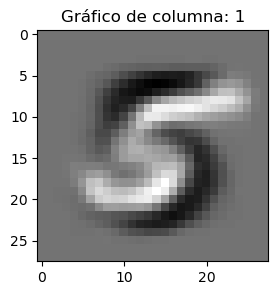

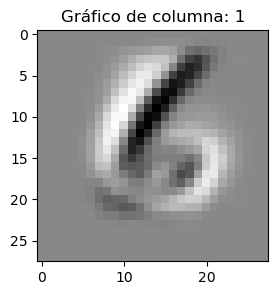

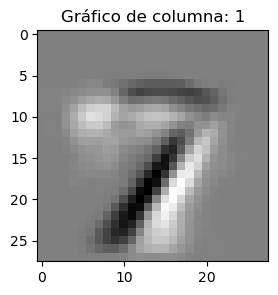

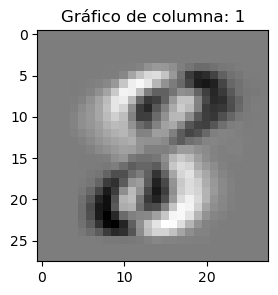

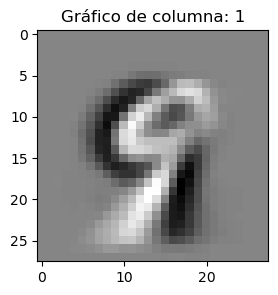

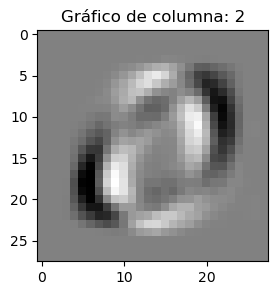

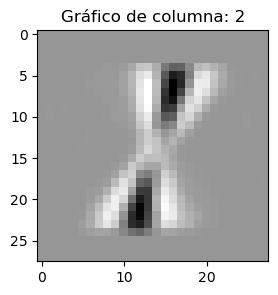

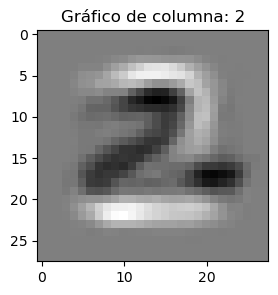

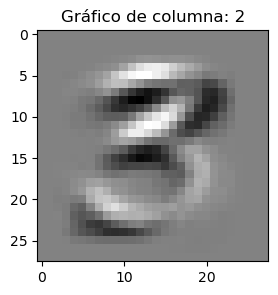

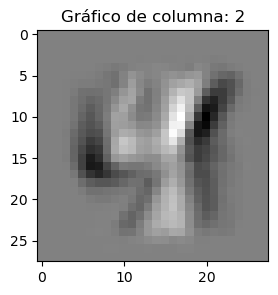

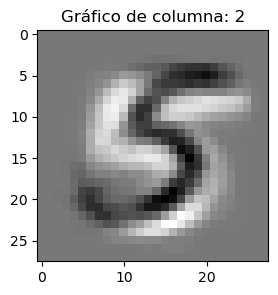

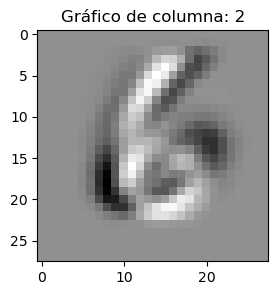

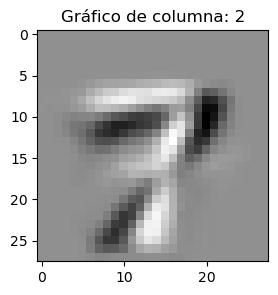

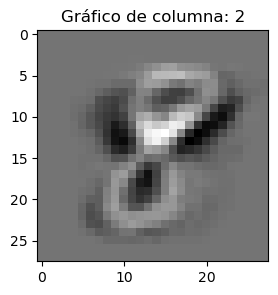

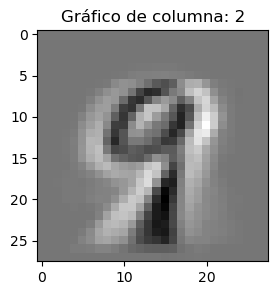

In [37]:
#Graficamos las columnas 2 y 3
grafico_columna_matriz(matrices_U, 1)
grafico_columna_matriz(matrices_U, 2)

### Conclusiones

De acuerdo a lo observado en los gráficos de columna para cada una de las matrices U, podemos ver que la primera columna representa una imagen muy similar a la del promedio calculado para el dígito. A medida que aumentamos el número de columna tomado, el gráfico se distorsiona, tomando distintos tonos de grises y perdiendo nitidez.

Sabiendo que cada una de estas columnas de U se corresponde con un valor singular de la matriz del dígito y teniendo en cuenta que estos valores se ordenan de manera descendente, los gráficos nos permiten concluir que existe una relación entre el valor singular i y la información que guarda la columna i de U: cuanto mayor sea el sv, más detalles guarda la columna sobre el comportamiento de los datos de la matriz y, por ese motivo, mejor aproxima su gráfico al gráfico correspondiente al promedio.


### ITEM E

In [38]:
#Defino una función que, dada una matriz U de mxn y un k entero, devuelve una matriz de mxk 
#de las primeras k columnas de U
def tomar_columnas(U, k):
    matriz = U[:, :k]
    
    return matriz

#Dada una matriz U, la función devuelve la matriz que proyecta ortogonalmente
#sobre la imagen de U
def matriz_de_proyeccion(U):
    U_transpuesta = U.T
    matriz = U @ U_transpuesta
    
    return matriz

#Funcion que, dado un vector v y una matriz U, devuelve la proyección ortogonal
# de v sobre la imagen g
def proyeccion_sobre_imagen(v, U):
    matriz = matriz_de_proyeccion(U)
    proy = matriz @ v
    
    return proy

#Dada una imagen vectorizada x y una matriz U, la función devuelve el residuo, definido como la 
#diferencia entre el vector x y la proyección ortogonal de x sobre la imagen de U
def residuo(x, U):
    residuo = x - proyeccion_sobre_imagen(x, U)
    
    return residuo

#Función que, dada la lista de matrices U correspondientes a todos los dìgitos, una
#imagen vectorizada x y un valor de rango k, devuelve la predicción del dìgito
#para esa imagen en la aproximación del rango k

def prediccion_U(lista_U, x, k):
    #generamos una lista con la distancia para cada uno de los dígitos
    distancias = []
    for i in range(0, 10):
        U = lista_U[i]
        Uk = tomar_columnas(U, k)
        res = residuo(x, Uk)
        distancia = np.linalg.norm(res)
        distancias.append(distancia)
    
    #Una vez creada la lista, buscamos el ìndice de su menor valor
    menor_distancia = min(distancias)
    prediccion = distancias.index(menor_distancia)
    
    return prediccion

#Dada la lista de matrices U, una imagen de testeo y un k entero, la función
#devuelve una lista con las predicciones para la imagen en rango k
def lista_predicciones_U(lista_U, test, k):
    predicciones = []
    l = test.shape[0]
    for i in range(0, l):
        imagen = fila_df(test, i)[1:] #defino el vector con la imagen del digito
        pred = prediccion_U(lista_U, imagen, k)
        predicciones.append(pred)
        
    return predicciones

def lista_precisiones(lista_U, test):
    precisiones = []
    for k in range(1, 6):
        predicciones = lista_predicciones_U(lista_U, test, k)
        prec = precision(test, predicciones)
        precisiones.append(prec)
    
    return precisiones
    
    
prueba = lista_precisiones(matrices_U, test_reducido)
print(prueba)

[0.77, 0.87, 0.92, 0.945, 0.945]


## EJERCICIO 5

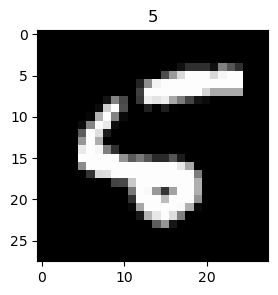

Su prediccion: 2
Predicciones por columnas:  [2, 2, 9, 9, 9]


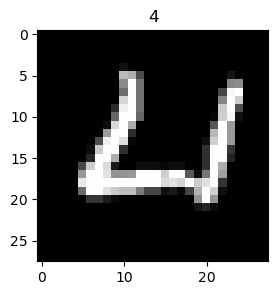

Su prediccion: 4
Predicciones por columnas:  [0, 6, 6, 6, 6]


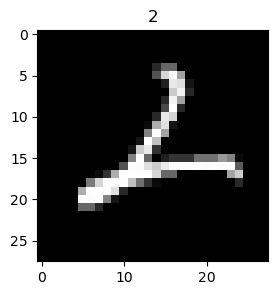

Su prediccion: 1
Predicciones por columnas:  [2, 2, 2, 2, 2]


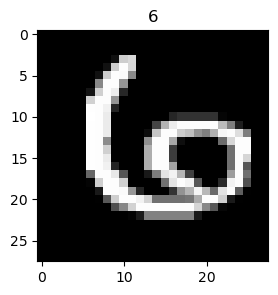

Su prediccion: 2
Predicciones por columnas:  [2, 2, 2, 6, 6]


In [39]:
def errores_columna(M_U, df, k):
    
    predicciones_k = lista_predicciones_U(M_U, df, k)
    errores_k = errores(df, predicciones_k)
    
    return errores_k

C1 = errores_columna(matrices_U, test_reducido, 1)
C2 = errores_columna(matrices_U, test_reducido, 2)
C3 = errores_columna(matrices_U, test_reducido, 3)
C4 = errores_columna(matrices_U, test_reducido, 4)
C5 = errores_columna(matrices_U, test_reducido, 5)


def anotar_predicciones_fila_columna(M, df, k, n):
    predicciones = []
    for i in range(1,k+1):
        pred = lista_predicciones_U(M, df, i)[n]
        predicciones.append(pred)
        
    return predicciones


# -- Graficos de los distintos casos de errores -- 

# Grafico de un numero que falla en todas las predicciones
predicciones_8 = anotar_predicciones_fila_columna(matrices_U, test_reducido, 5, 8)
imagen(8, test_reducido)
p_prom = prediccion_promedio(matriz_promedios, test_reducido, 8)
print("Su prediccion:" , p_prom)
print("Predicciones por columnas: ", predicciones_8)


# Grafico que las columnas predicen mal pero el promedio no
predicciones_33 = anotar_predicciones_fila_columna(matrices_U, test_reducido, 5, 33)

imagen(33, test_reducido)
p_prom = prediccion_promedio(matriz_promedios, test_reducido, 33)
print("Su prediccion:" , p_prom)
print("Predicciones por columnas: ", predicciones_33)


# Grafico de un numero que el promedio lo predice mal pero no las columnas (hasta el 5)
predicciones_43 = anotar_predicciones_fila_columna(matrices_U, test_reducido, 5, 43)

imagen(43, test_reducido)
p_prom = prediccion_promedio(matriz_promedios, test_reducido, 43)
print("Su prediccion:" , p_prom)
print("Predicciones por columnas: ", predicciones_43)


# Grafico de un digito que a partir de la columna 4 se puede predecir correctamente y el promedio tambien falla
predicciones_54 = anotar_predicciones_fila_columna(matrices_U, test_reducido, 5, 54)

imagen(54, test_reducido)
p_prom = prediccion_promedio(matriz_promedios, test_reducido, 54)
print("Su prediccion:" , p_prom)
print("Predicciones por columnas: ", predicciones_54)



### Conclusiones

Analizando los resultados de precisión obtenidos para cada uno de los casos, podemos ver que el modelo de predicción basado en la descomposición SVD muestra ser mucho más preciso que el que utiliza los promedios de cada dígito.
Como observamos en el punto anterior, la primera columna de U parece contener información similar a la del promedio de cada dígito. En este ejercicio pudimos ver, además, que el valor de la precisión tomando sólo esa primera columna es igual al calculado en el ejercicio 2c. para la predicción utilizando promedios.

Viendo que la precisión aumenta a medida que tomamos más columnas de U, concluimos que, si bien u1 parece ser la columna que más información guarda sobre la matriz, las ui siguientes también almacenan detalles sobre el comportamiento de los datos de la matriz.

Sabiendo que las columnas de la matriz U son linealmente independientes por ser ortogonal, pensamos que esta independencia lineal puede significar que cada columna aporta información sobre los datos que no se tenía previamente, contribuyendo a la capacidad predictiva del modelo.

Esto se ve, por ejemplo, en el caso de la fila 54, la cual fue etiquetada incorrectamente utilizando los promedios de cada dígito y tomando las primeras 3 columnas de las matrices U, pero fue bien identificada tomando k=4 y k=5.

Sin embargo, observando los errores para cada k, vimos que con k = 5 se predijeron incorrectamente dígitos que con k = 4 fueron bien etiquetados. Suponemos que esta situación puede deberse a que la información aportada por la columna, si bien puede esclarecer algunos casos, podría generar confusión en algunos otros, desviando la predicción del modelo. 

